In [10]:
import matplotlib.pyplot as plt
import numpy as np
import torch

path = 'runs/continuous_lunar_lander/2023-12-07 22:13:57.425933'

In [11]:
import os 
max_generation = max([int(file.split('_')[-1].split('.')[0]) for file in os.listdir(path)])
  

In [12]:
fitness_per_generation = []
max_number_of_species = 0
number_of_individuals = None
max_fitness = -np.inf
min_fitness = np.inf
for generation in range(max_generation):
    fitness_per_species = torch.load(f'{path}/fitness_perspecies_{generation}.pt')
    max_number_of_species = max(max_number_of_species, len(fitness_per_species))
    
    max_fitness = max(max_fitness, max([max(fitness) for fitness in fitness_per_species.values()]))
    # print max fitness generation and species
    print(f'generation {generation} max fitness {max([max(fitness) for fitness in fitness_per_species.values()])} species {max(fitness_per_species, key=lambda x: len(fitness_per_species[x]))}')
    min_fitness = min(min_fitness, min([min(fitness) for fitness in fitness_per_species.values()]))
    assert number_of_individuals == sum([len(fitness) for fitness in fitness_per_species.values()]) or number_of_individuals is None
    number_of_individuals = sum([len(fitness) for fitness in fitness_per_species.values()])

generation 0 max fitness -103.61097342764364 species 0
generation 1 max fitness -54.07233553718802 species 0
generation 2 max fitness -104.46635975302823 species 0
generation 3 max fitness -91.97987517147642 species 0
generation 4 max fitness -94.40742406504356 species 0
generation 5 max fitness -83.29797986431774 species 0
generation 6 max fitness -67.52250136357415 species 0
generation 7 max fitness -84.4140894328539 species 0
generation 8 max fitness -70.10060385362995 species 0
generation 9 max fitness -27.988247728192768 species 0
generation 10 max fitness -28.070371732312697 species 0
generation 11 max fitness -65.6037732108214 species 0
generation 12 max fitness -43.51781892748001 species 0
generation 13 max fitness -3.803505325666646 species 0
generation 14 max fitness -21.21997967719797 species 0
generation 15 max fitness 3.2040327802578843 species 0
generation 16 max fitness 29.102562744190163 species 0
generation 17 max fitness 64.02965858527378 species 0
generation 18 max f

In [13]:
width = number_of_individuals + max_number_of_species-1 # white border between
height = max_generation + 1
heatmap = np.zeros((height, width))
for generation in range(max_generation):
    fitness_per_species = torch.load(f'{path}/fitness_perspecies_{generation}.pt')
    num_species = len(fitness_per_species)
    position_counter = 0
    min_fitness_in_run = min([min(fitness) for fitness in fitness_per_species.values()])
    for species in range(num_species):
        fitnesses = fitness_per_species[species]
        # sort by fitness
        fitnesses = sorted(fitnesses)
        fitnesses = [0 if fitness < 0 else fitness for fitness in fitnesses]
        # normalize by max and min fitness
        fitnesses = [(fitness)/(max_fitness) for fitness in fitnesses]
        #fitnesses = [1 if fitness > 0.9 else 0 for fitness in fitnesses]
        
        for fitness in fitnesses:
            heatmap[generation, position_counter] = fitness
            position_counter += 1
        
        if position_counter < width:
            heatmap[generation, position_counter] = 1
        position_counter += 1 # white border between species
    

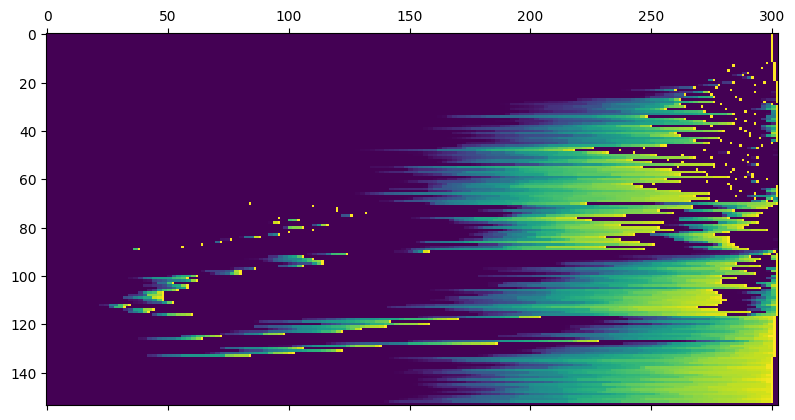

In [14]:


plt.matshow(heatmap)
plt.show()

In [15]:
# plot max fitness per species and generation

max_fitness_per_species = {}

for generation in range(max_generation):
    fitness_per_species = torch.load(f'{path}/fitness_perspecies_{generation}.pt')
    for species, fitnesses in fitness_per_species.items():
        if species not in max_fitness_per_species:
            max_fitness_per_species[species] = []
        
        fitnesses = [-500 if fitness < -500 else fitness for fitness in fitnesses]
        max_fitness_per_species[species].append((generation,max(fitnesses)))

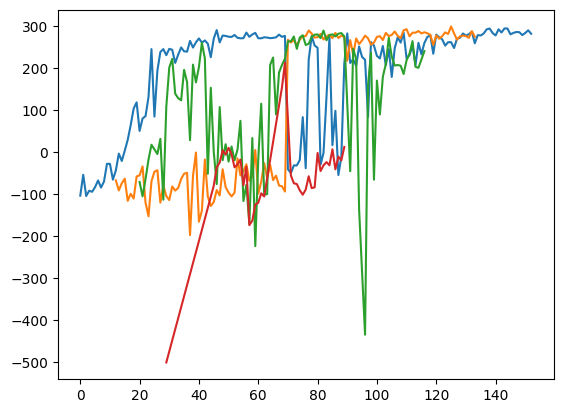

In [16]:
# plot
for species, fitnesses in max_fitness_per_species.items():
    plt.plot([fitness[0] for fitness in fitnesses], [fitness[1] for fitness in fitnesses], label=f'species {species}')